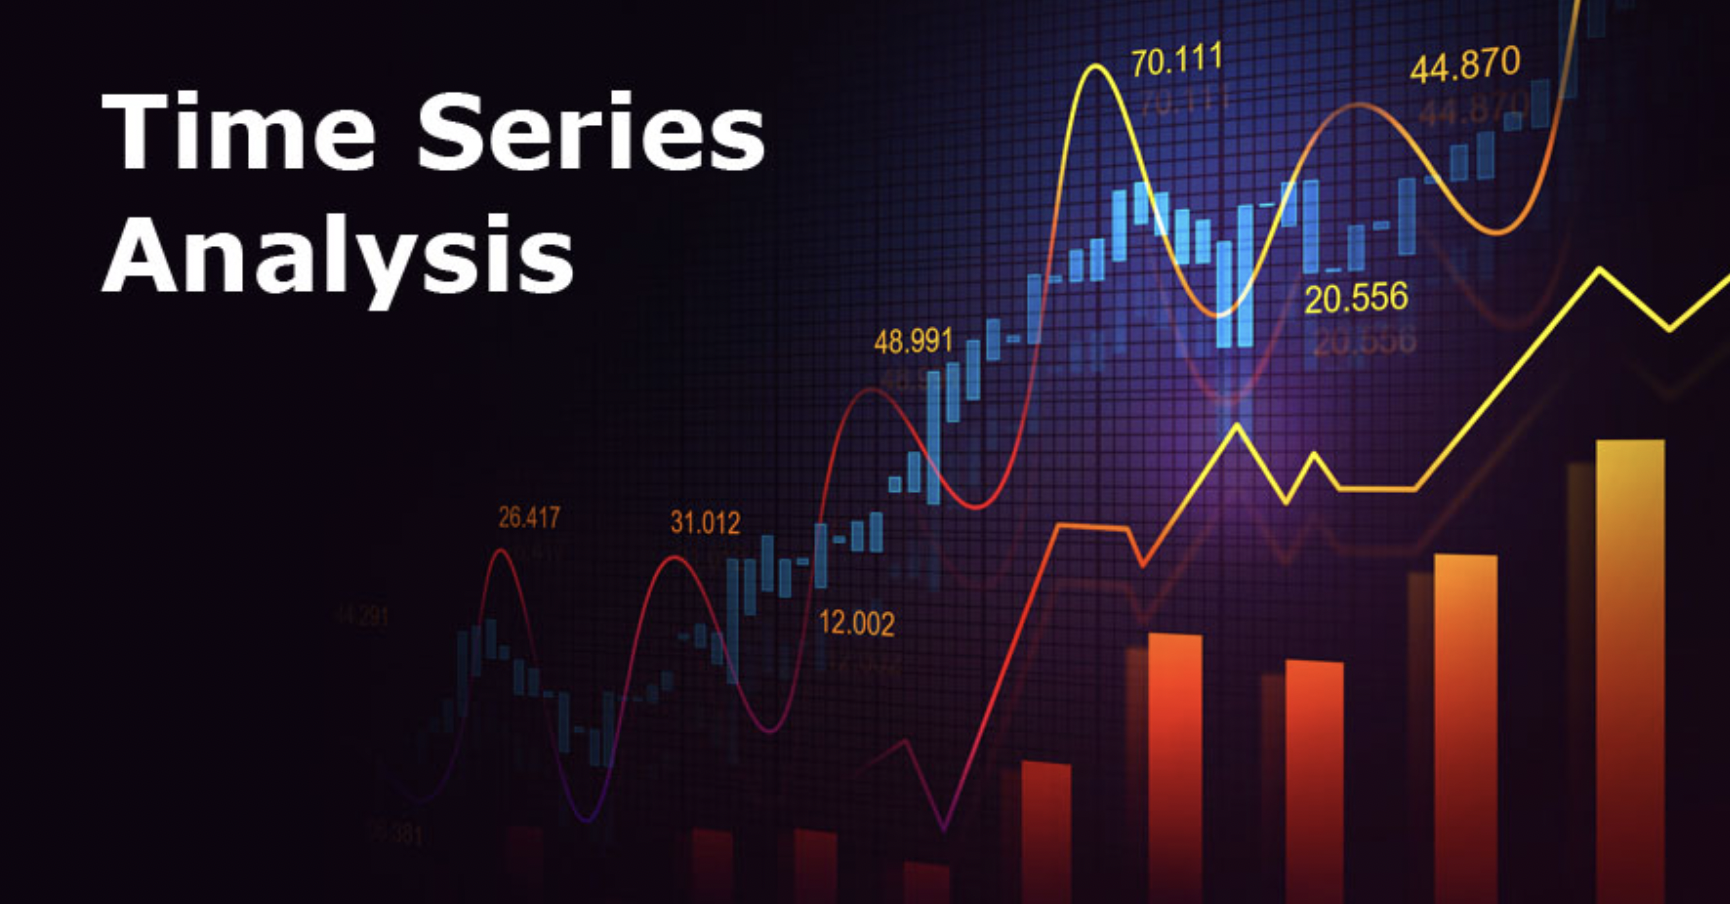

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report.

Create modules (wrangle.py) that make your process repeateable and your report (notebook) easier to read and follow.

Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

Construct an timeseries model that predict temp change or future temperature from Greenland.

Make recommendations to a data science team about how to improve predictions.

Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.


# Business Goals:

My goal is to find key driver for temperature change in Greenland

Construct an time series model that predict temperature change or future temp from Greenland.

Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in prediction temperature in Greenland.


# Questions:

• Can we predict the future temperature of greenland??

• Whats the highest temperature greenland had??

• Greenland mean temperature??


# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
#custom imports with all functions
import wrangle 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# 1)Acquire:

In [2]:
#acquired from a csv file downloaded from kaggle 
df=wrangle.acquire_global()

# Acquire takeaways:

• Acquired data from csv file named 'GlobalLandTemperaturesByCountry.csv'

• Columns dt,AverageTemperature,AverageTemperatureUncertainty,Country

• 577462 entries
# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# 2)Prepare/Split in train,val,test:

In [3]:
#preparing data using a wrangle file while getting rid of nulls
df=wrangle.prepare_global(df,1.5)

# Prepapre Takeaways:

• Columns dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Fahrenheit,Fahrenheit_Uncertainty

• Converted cel into fahrenheit

• Made the dt into panda datetime64

In [4]:
#split data using a function from wrangle file
train,val,test=wrangle.split_timeseries(df)

# Dictianary 
|Attribute|Old keys|        Data type   |       Definition   |
| -------- |-------- | -------- | -------- | 
|AverageTemperature |AverageTemperature|float |  temp|
|AverageTemperatureUncertainty |AverageTemperatureUncertainty|float |temp
|Country|Country|object | location |
|year |N/A|int|split into years 
|Fahrenheit |N/A|float |temp/usa method |
|Fahrenheit_Uncertainty |N/A |float |temp/usa method|
|dt |dt |time |date|

# Split takeaways:

• split the data into train,val,test

• Took out AverageTemperature,AverageTemperatureUncertainty
# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# 3)Exploration:


# Hypotheses:
`Hypothesis 1:`

`Ho`-> The temperature before 1905 is the same as after 1905

`Ha` -> The temperature before 1905 is different than after 1905

`Hypothesis 2:`

`Ho`-> The Fahrenheit_Uncertainty before 1905 is the same as after 1905

`Ha` -> The Fahrenheit_Uncertainty before 1905 is different than after 1905


`Hypothesis 3:`

`Ho`-> The Fahrenheit is colder around december then june 

`Ha` -> The Fahrenheit is warmer around december then june 

`Hypothesis 4:`

`Ho`-> The Fahrenheit before 1900 is the same as after 1900

`Ha` -> The Fahrenheit before 1900 is different than after 1900

# `Hypothesis 1:`

`Ho`-> The temperature before 1905 is the same as after 1905

`Ha` -> The temperature before 1905 is different than after 1905

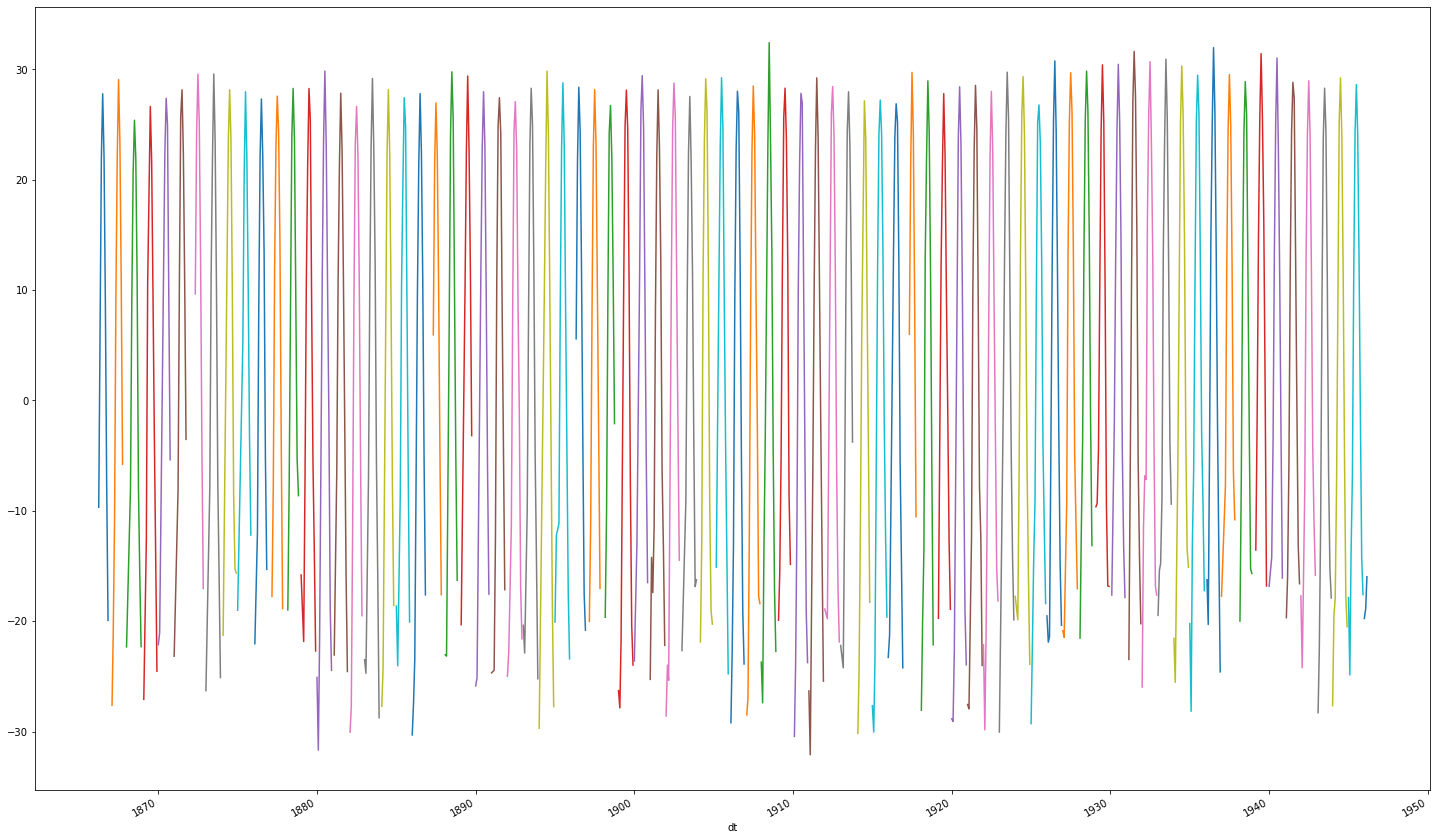

In [5]:
#greenland all year around 
wrangle.Greenland_graph4(train)

In [6]:
#T-Test: Two-sample, Two-tail
wrangle.stats0(train)

Fail to reject the Null Hypothesis


# Takeaways:

• Greenland is very consistent,no year actualy stands out 

• Findings suggest the temperature before 1905 is the same as after.'

• No big different in temperature

# `Hypothesis 2:`

`Ho`-> The Fahrenheit_Uncertainty before 1905 is the same as after 1905

`Ha` -> The Fahrenheit_Uncertainty before 1905 is different than after 1905

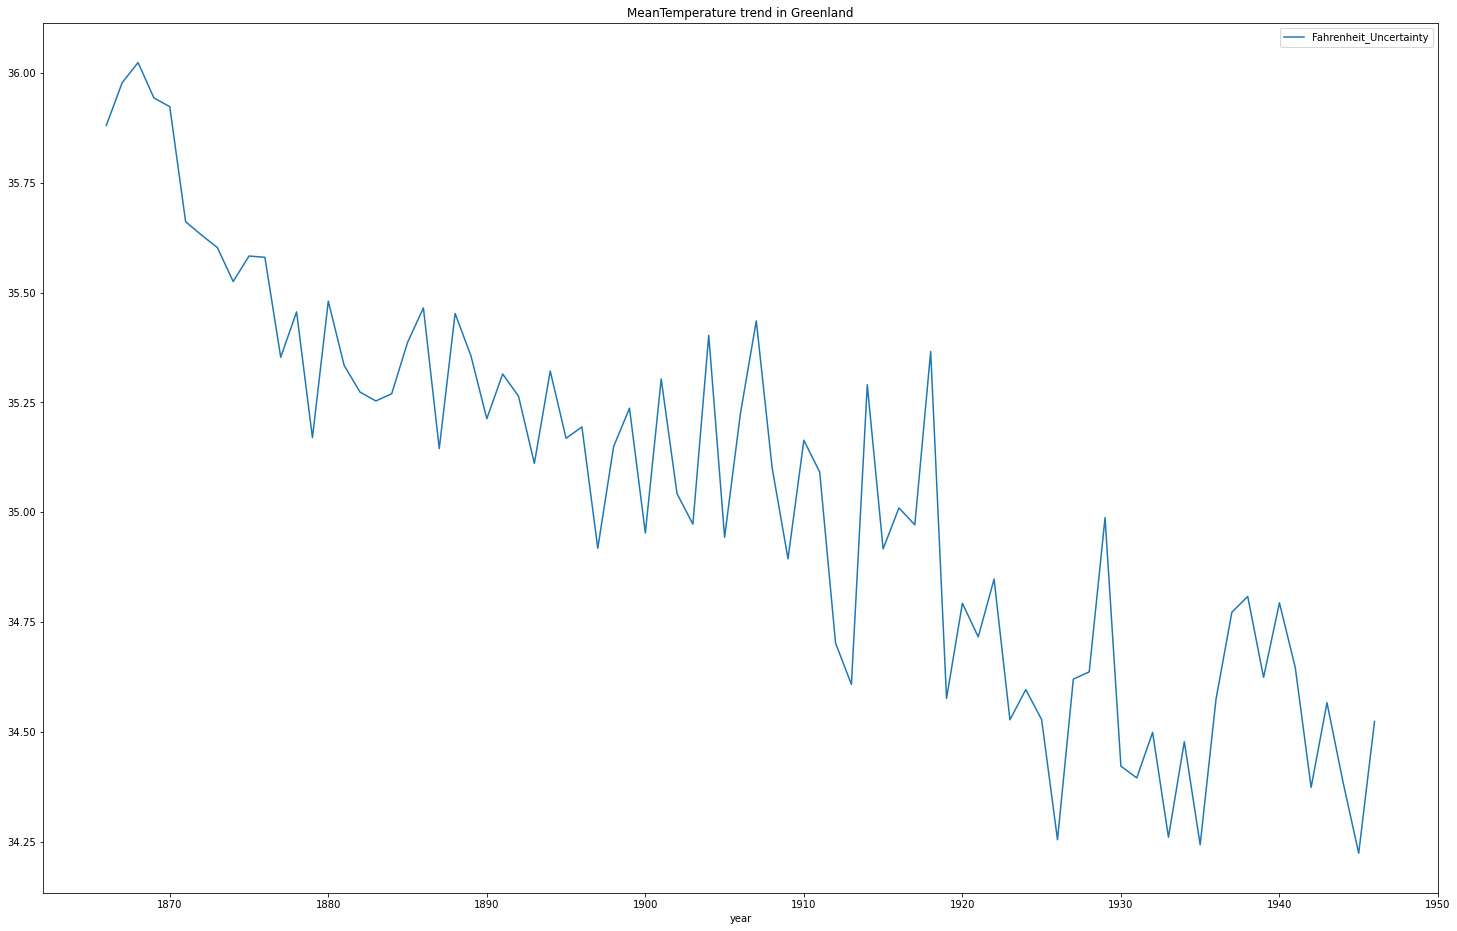

In [7]:
#Fahrenheit_Uncertainty graph
wrangle.Greenland_graph(train)

In [8]:
#T-Test: Two-sample, Two-tail
wrangle.stats2(train)

Reject the Null Hypothesis. different


# Takeaways:

• Drop of Fahrenheit_Uncertainty keeps going down

• Reject the Null Hypothesis. different of 1905 and above

• 1870 was the highest

# `Hypothesis 3:`

`Ho`-> The Fahrenheit is colder around december then june 

`Ha` -> The Fahrenheit is warmer around december then june 

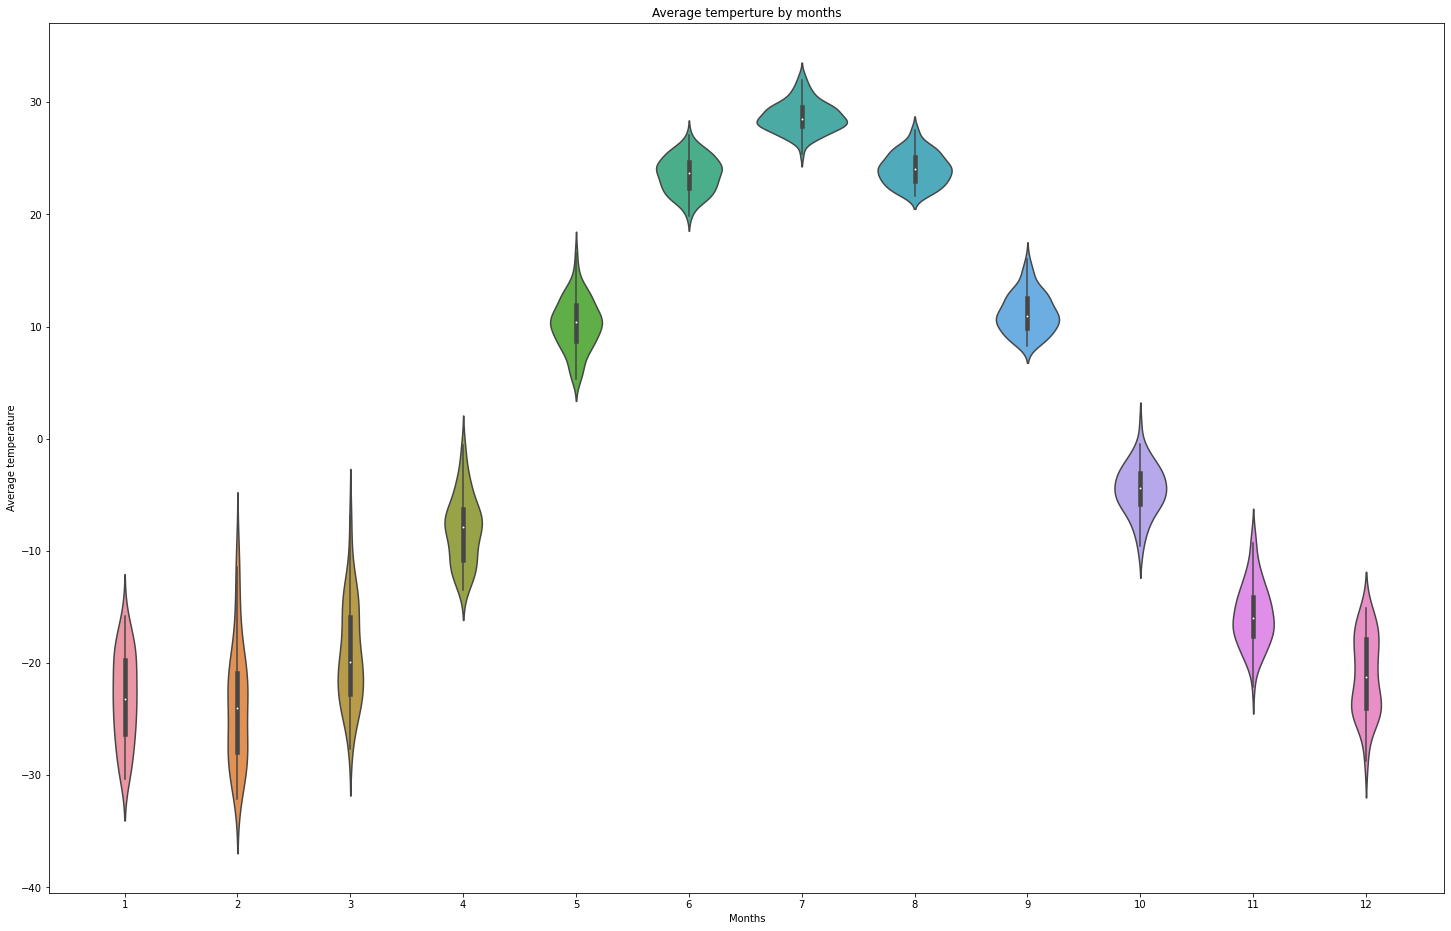

In [9]:
#graph of months for fahrenheit
wrangle.sea_born1(train)

# Takeaways:

• Between 6-9 has a higher Fahrenheit

• lowest Fahrenheit is around the 1month -3 month 

• starts to cold down again at the end of the year 

# `Hypothesis 4:`

`Ho`-> The Fahrenheit before 1900 is the same as after 1900

`Ha` -> The Fahrenheit before 1900 is different than after 1900

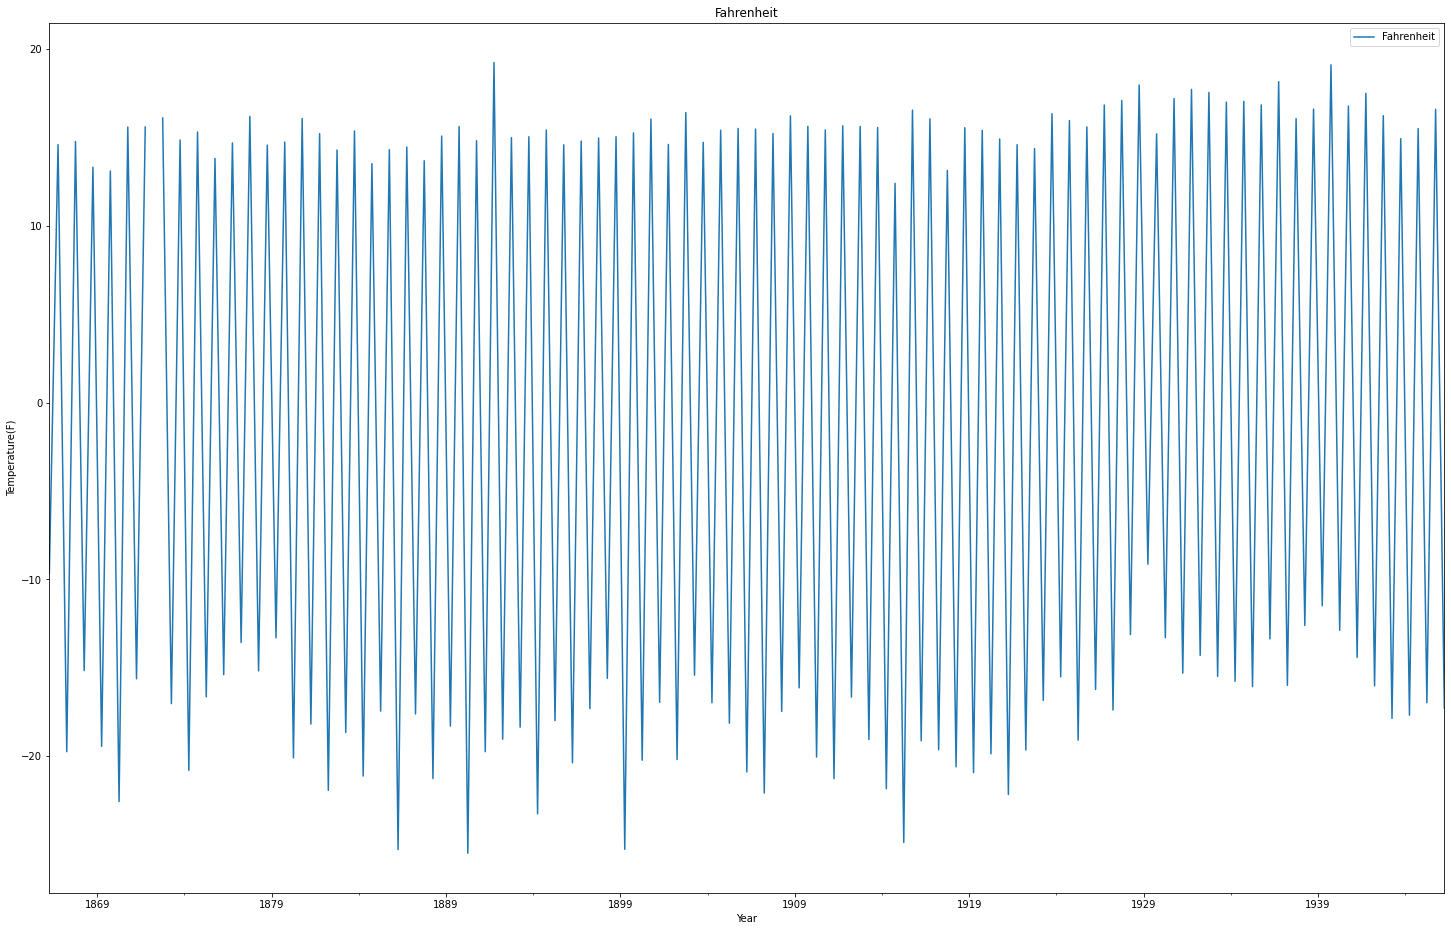

In [10]:
#6month graph of Fahrenheit
wrangle.Greenland_graph6(train)

In [11]:
#T-Test: Two-sample, Two-tail
wrangle.stats4(train)

Fail to reject the Null Hypothesis


# Takeaways:

• fail to reject null meaning 1900 and above have some similaries 

• split the graph into years using sample 

• all iis the same

# Exploration takeaways:

• December is the coldest month

• all years have around the same pathern of temp

• 1900 and below wasnt as much different from above years 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# 4)Modeling:
Use selected features or clustered data to predict the target logerror

Algorithms used:

•Last Observed Model

•Simple Average Model

•Previous year model

Data for modeling:

Best model:

•Previous year model

# Modeling takeaways:

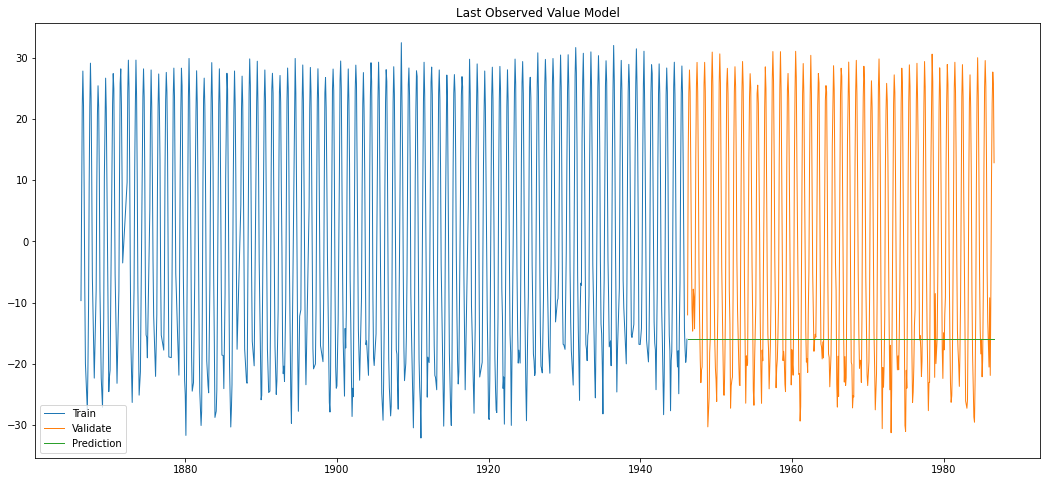

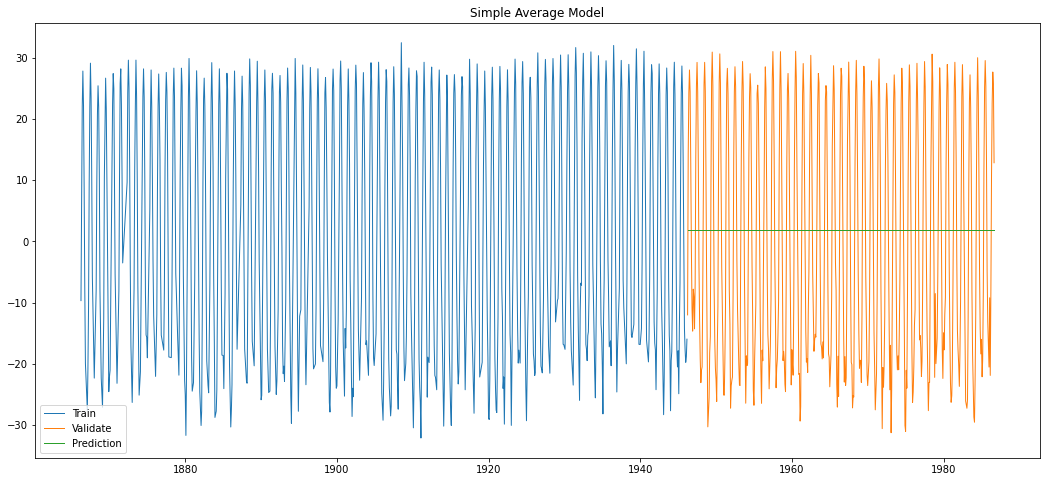

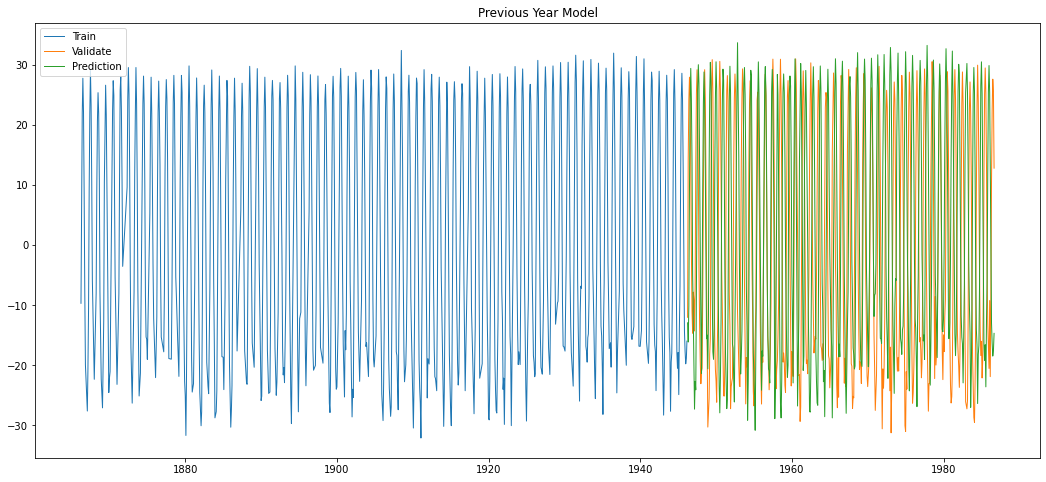

model_type  target_var  rmse
0  last_observed_value  Fahrenheit  25.0
1       simple_average  Fahrenheit  19.0
2        previous_year  Fahrenheit  29.0

In [12]:
#modeling 
results = wrangle.run_models(train, val)
results

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# 5)Model Evaluation:

Best model:

•Previous year model

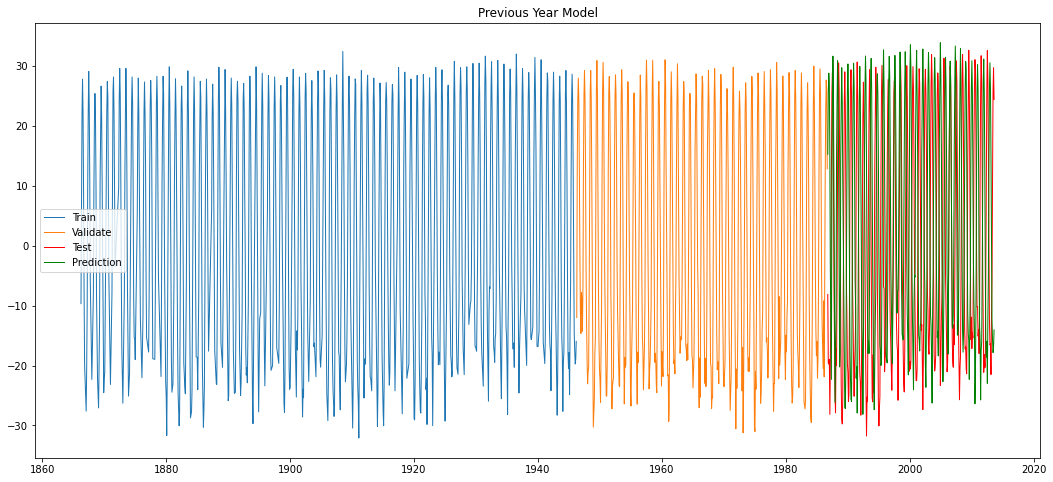

model_type  target_var  rmse
0  test_resutls  Fahrenheit  30.0

In [13]:
#best model
wrangle.best_model(train, val, test)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Conclusion/Recommnedations/Next Steps:
`Conclusion:`

• We could conclude that Fahrenheit for greenland is very very cold so go live there...

• In conclusion Fahrenheit for Greenland change all seasons but keep the same pathern?

• We could conclude that the Previous year model perform the best with a rmse rate of 30.0

`Recommendations:`

• I recommen that we check if anything happen when the temp got cold if any natural disasters happened.

• We cant change mothernatural but we could predict it at a close percentage. 

`Next Steps:`

• I would love to dive into more country. How different country change in temp. This data has so much potential but i would just be digging myself into a rabbit hole.

# Steps to reproduce finalnotebook:
data set was collected from kaggle(https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)


1)Download the following files 

• Wrangle.py

•'GlobalLandTemperaturesByCountry.csv'

• finalnotebook.pynd

2) After downloading files make sure all files are in the same folder or location 

3) Onces step two and step one are done you would be able to run finalnotebook without errors and on your own 